# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [11]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [39]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,new,Group,status
0,18.0,8,307,130,3504,12.0,C-1689780,False,two,Control
1,15.0,8,350,165,3693,11.5,B-1689791,False,two,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,False,one,Control
3,16.0,8,304,150,3433,12.0,A-1689813,False,one,Control
4,17.0,8,302,140,3449,10.5,F-1689824,False,one,Control
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,True,two,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,True,one,Control
395,32.0,4,135,84,2295,11.6,D-1694125,True,two,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,True,two,Treatment


<font size = "5">

Compute frequencies by status

In [13]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,227
Treatment,171


col_0,Frequency
status,
Control,0.570352
Treatment,0.429648


<font size = "5">

Query with string conditions

In [14]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [38]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,24.076608,5.350877,189.941520,2952.877193,15.556725
std,8.113977,1.713180,107.825006,855.047499,2.939247
min,11.000000,3.000000,70.000000,1795.000000,8.500000
25%,18.000000,4.000000,104.500000,2254.500000,13.500000
50%,23.500000,4.000000,140.000000,2671.000000,15.500000
75%,29.950000,7.000000,259.000000,3552.500000,17.300000
max,46.600000,8.000000,455.000000,4955.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,227.000000,227.000000,227.000000,227.000000,227.000000
mean,23.091189,5.533040,196.052863,2983.643172,15.576652
std,7.574305,1.691339,101.668935,842.259388,2.619216
min,9.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.000000,4.000000,101.500000,2207.500000,14.000000
50%,21.600000,6.000000,156.000000,2901.000000,15.500000
75%,29.000000,8.000000,284.500000,3611.000000,17.000000
max,43.400000,8.000000,440.000000,5140.000000,23.700000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [40]:
carfeatures = pd.read_csv("data_raw/features.csv")

mpg_mean = np.mean(carfeatures["mpg"])

def greater_mean(mpg):
    if mpg >= mpg_mean:
        return True
    elif mpg < mpg_mean:
        return False
    
carfeatures["new"] = carfeatures["mpg"].apply(greater_mean)

print(mpg_mean)
display(carfeatures)



23.514572864321607


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,new
0,18.0,8,307,130,3504,12.0,C-1689780,False
1,15.0,8,350,165,3693,11.5,B-1689791,False
2,18.0,8,318,150,3436,11.0,P-1689802,False
3,16.0,8,304,150,3433,12.0,A-1689813,False
4,17.0,8,302,140,3449,10.5,F-1689824,False
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,True
394,44.0,4,97,52,2130,24.6,V-1694114,True
395,32.0,4,135,84,2295,11.6,D-1694125,True
396,28.0,4,120,79,2625,18.6,F-1694136,True


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [21]:
display(carfeatures)

median_weight = np.median(carfeatures["weight"])
mean_acc = np.mean(carfeatures["acceleration"])


# subset of the dataset
query1 = carfeatures.query("weight > @median_weight & acceleration < @mean_acc")
display(query1)
print(median_weight)
print(mean_acc)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,new
0,18.0,8,307,130,3504,12.0,C-1689780,False
1,15.0,8,350,165,3693,11.5,B-1689791,False
2,18.0,8,318,150,3436,11.0,P-1689802,False
3,16.0,8,304,150,3433,12.0,A-1689813,False
4,17.0,8,302,140,3449,10.5,F-1689824,False
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,True
394,44.0,4,97,52,2130,24.6,V-1694114,True
395,32.0,4,135,84,2295,11.6,D-1694125,True
396,28.0,4,120,79,2625,18.6,F-1694136,True


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,new
0,18.0,8,307,130,3504,12.0,C-1689780,False
1,15.0,8,350,165,3693,11.5,B-1689791,False
2,18.0,8,318,150,3436,11.0,P-1689802,False
3,16.0,8,304,150,3433,12.0,A-1689813,False
4,17.0,8,302,140,3449,10.5,F-1689824,False
...,...,...,...,...,...,...,...,...
333,32.7,6,168,132,2910,11.4,D-1693443,True
336,23.6,4,140,?,2905,14.3,F-1693476,True
361,25.4,6,168,116,2900,12.6,T-1693751,True
362,24.2,6,146,120,2930,13.8,D-1693762,True


2803.5
15.568090452261307


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [27]:
# Top 5 values
carfeatures.sort_values(by = "weight", ascending = False).iloc[0:5,]

# Top 5 lowest vaues
carfeatures.sort_values(by = "weight", ascending = True).iloc[0:5,]

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,new
54,35.0,4,72,69,1613,18.0,D-1690374,True
144,31.0,4,76,52,1649,16.5,T-1691364,True
343,39.1,4,79,58,1755,16.9,T-1693553,True
345,35.1,4,81,60,1760,16.1,H-1693575,True
53,31.0,4,71,65,1773,19.0,T-1690363,True


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [36]:
display(carfeatures)

# So we can input our different groups, proportions of each group
size_data = len(carfeatures)
groups = ["one", "two", "three"]
proportions = [0.3, 0.5, 0.2]

# This creates an array that is the length of your data
np.random.choice(groups,
size = size_data,
p = proportions)

# Assign
carfeatures["Group"] = np.random.choice(groups, size = size_data, p = proportions)

# Create the three query groups
one = carfeatures.query("Group == 'one'")
two = carfeatures.query("Group == 'two'")
three = carfeatures.query("Group == 'three'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,new,Group
0,18.0,8,307,130,3504,12.0,C-1689780,False,two
1,15.0,8,350,165,3693,11.5,B-1689791,False,two
2,18.0,8,318,150,3436,11.0,P-1689802,False,two
3,16.0,8,304,150,3433,12.0,A-1689813,False,two
4,17.0,8,302,140,3449,10.5,F-1689824,False,two
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,True,one
394,44.0,4,97,52,2130,24.6,V-1694114,True,two
395,32.0,4,135,84,2295,11.6,D-1694125,True,three
396,28.0,4,120,79,2625,18.6,F-1694136,True,two


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,new,Group
1,15.0,8,350,165,3693,11.5,B-1689791,False,one
4,17.0,8,302,140,3449,10.5,F-1689824,False,one
5,15.0,8,429,198,4341,10.0,F-1689835,False,one
6,14.0,8,454,220,4354,9.0,C-1689846,False,one
9,15.0,8,390,190,3850,8.5,A-1689879,False,one
...,...,...,...,...,...,...,...,...,...
387,38.0,6,262,85,3015,17.0,O-1694037,True,one
389,22.0,6,232,112,2835,14.7,F-1694059,False,one
391,36.0,4,135,84,2370,13.0,D-1694081,True,one
393,27.0,4,140,86,2790,15.6,F-1694103,True,one


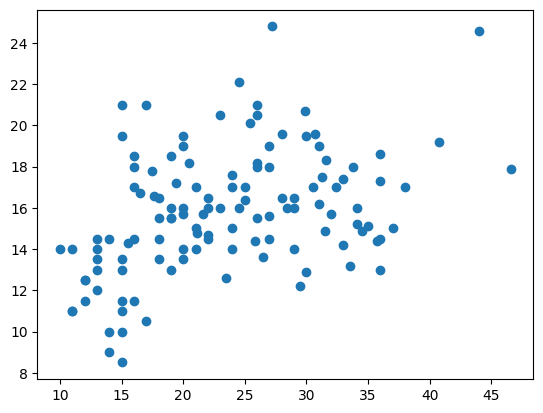

In [31]:
display(one)

# For this example we will plot acceleration vs. mpg
plt.scatter(x = one["mpg"], y = one["acceleration"])
plt.show()

# Basically this question will probably just ask us to calculate a bunch of stats and then the error of a random line

def line_mxb(x, b0, b1):
    return b0 + b1*x

def error_line(line_out, y):
    return line_out - y

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

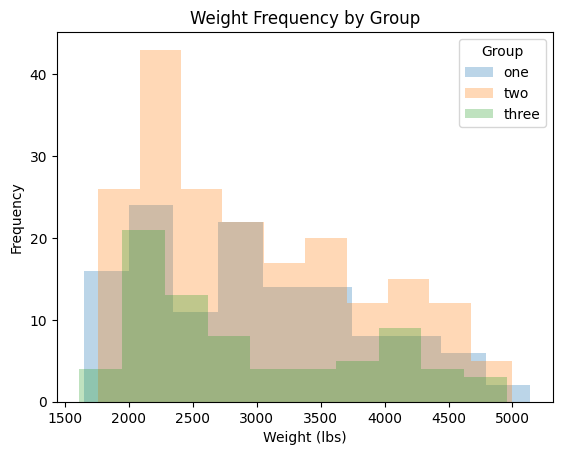

In [41]:
plt.hist(x = one["weight"], alpha = 0.3)
plt.hist(x = two["weight"], alpha = 0.3)
plt.hist(x = three["weight"], alpha = 0.3)
plt.title("Weight Frequency by Group")
plt.xlabel("Weight (lbs)")
plt.ylabel("Frequency")
plt.legend(labels = ["one", "two", "three"], title = "Group")